In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problem (a)

In [3]:
P = 0.3

By Moser, $W^+ = \text{BEC}(\delta^2)$ and $W^- = \text{BEC}(2\delta - \delta^2)$ for a BEC with erasure probability $\delta$. 

In [4]:
def Polar(d):
    return (2*d - d**2, d**2)

In [5]:
L = [0, 1, 2, 4, 8, 16]
Ns = [2**x for x in L]
EPS = 1e-8

In [6]:
def generate_channels(n):
    result = [P]
    while n > 1:
        result = [y for x in result for y in Polar(x)]
        n /= 2
    return result

Recall that the $\text{BEC}(\delta)$ has $I = 1 - \delta$.

In [7]:
def plot(n):
    Is = sorted(1-d for d in generate_channels(n))
    data = [(-0.02, 0.0)]
    data += [p for idx, c in enumerate(Is) for p in ((c-EPS, idx/n), (c+EPS, (idx+1)/n))]
    data.append((1.02, 1.0))
    X, Y = zip(*data)
    plt.plot(X, Y)
    plt.xlim(-0.1, 1.1)
    plt.xlabel('$\epsilon$')
    plt.ylim(-0.1, 1.1)
    plt.ylabel('$\\frac{1}{N}\\#\\{i : I(W^{(i)}_{N}) \\leq \\epsilon\\}$')
    plt.title('$N = %d$' % n)
    plt.show()

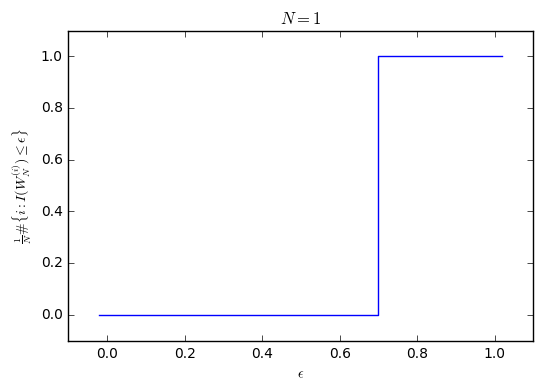

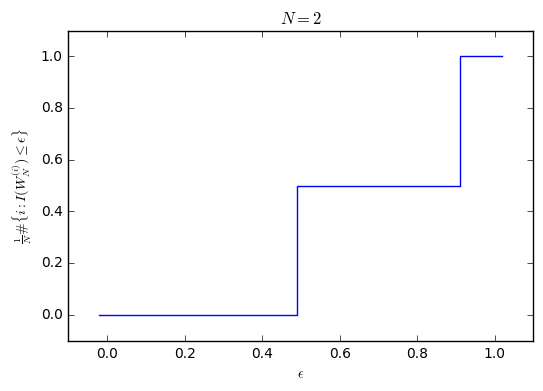

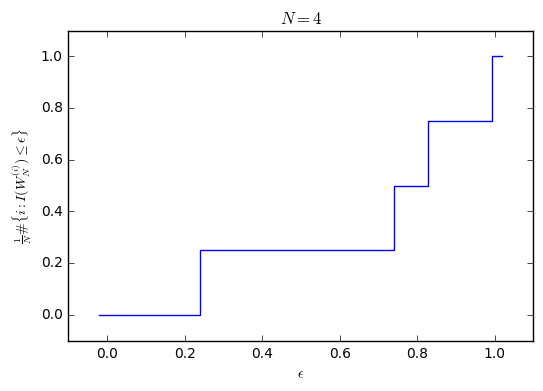

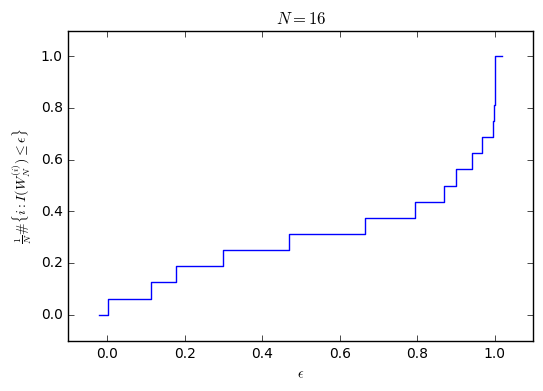

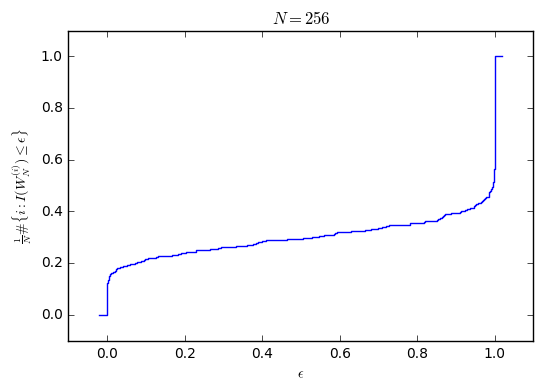

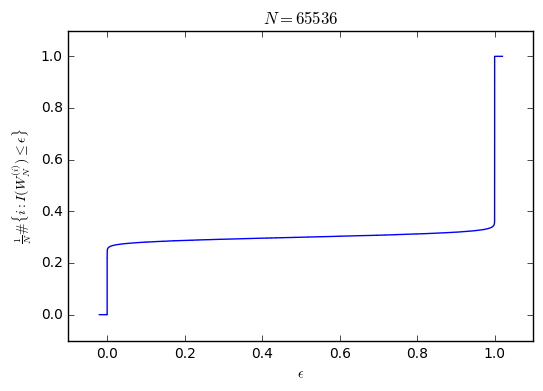

In [8]:
for n in Ns: plot(n)

### Problem(b)
By Moser, $Z(\text{BEC}(\delta)) = \delta$.

In [9]:
P = 0.3
N = 1024
R = 0.5
M = int(N * R)
L = 10 # log2(N)

In [10]:
channels = [(idx+1, c) for (idx, c) in enumerate(generate_channels(N))]
channels.sort(key=lambda c: c[1])
channels = list(channels)[:M]

Now sort by index

In [11]:
channels.sort(key=lambda c: c[0])
print('The first 5 indices is', [idx for (idx, z) in channels[:5]])

The first 5 indices is [192, 224, 236, 238, 239]


### Problem(c)
The close form of $H(U_i \mid U^{i-1})$ turn out to be too hard to calculated, So we use
$E[\log P(U_i \mid U^{i-1})]$ to approximate it.

The recursive formula is
$P(U_{2k+1} \mid U^{2k}) = P(0 \mid U_{even}) P(U_{2k+1} \mid U_{odd} \oplus U_{even}) + 
P(1 \mid U_{even}) P(U_{2k+1} \oplus 1 \mid U_{odd} \oplus U_{even})$
and
$$ P(U_{2k} \mid U^{2k-1}) = \frac{P(U_{2k} \mid U^{2k-2}_{even}) P(U_{2k} \oplus U_{2k-1} \mid U_{odd} \oplus U_{even})}{
P(U_{2k} \mid U^{2k-2}_{even}) P(U_{2k} \oplus U_{2k-1} \mid U_{odd} \oplus U_{even}) + 
P(U_{2k} \oplus 1 \mid U^{2k-2}_{even}) P(U_{2k} \oplus U_{2k-1} \oplus 1 \mid U_{odd} \oplus U_{even})} $$

Python is too slow for calculating these values, so I wrote a cpp program too calculate it.
The error is less then $0.01$. Thanks Kevin (B02901179) for lots of ideas and helping to run the code on M40 (56 cores) in this problem

In [12]:
from os.path import join as pjoin
import os

In [17]:
Ns = [1, 2, 4, 16, 256, 65536]

In [18]:
def get_data(n):
    res = []
    with open(pjoin(os.pardir, '%d.csv' % n)) as f:
        for l in f:
            l = l.strip()
            if not l: break
            _, _, x = l.split(',')
            x = float(x)
            res.append(x)
    return res


In [19]:
def plot2(n):
    Xs = sorted(1 - x for x in get_data(n))
    data = [(-0.02, 0.0)]
    data += [p for idx, x in enumerate(Xs) for p in ((x-EPS, idx/n), (x+EPS, (idx+1)/n))]
    data.append((1.02, 1.0))
    X, Y = zip(*data)
    plt.plot(X, Y)
    plt.xlim(-0.1, 1.1)
    plt.xlabel('$\delta$')
    plt.ylim(-0.1, 1.1)
    plt.ylabel('$\\frac{1}{N}\\#\\{i : H(U_i \mid U^{i-1}) \\leq 1-\\delta \\}$')
    plt.title('$N = %d$' % n)
    plt.show()

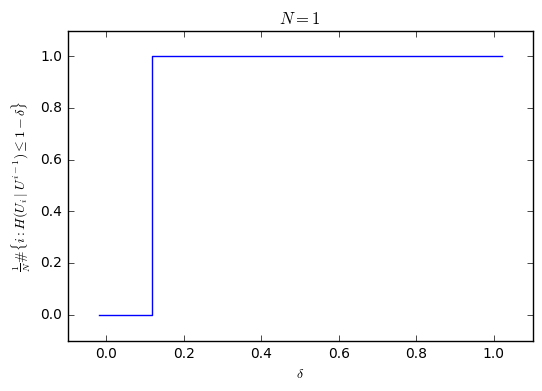

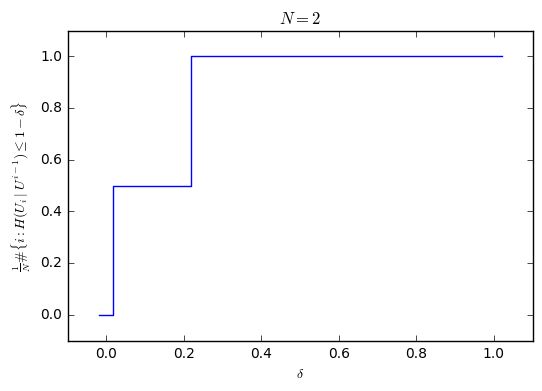

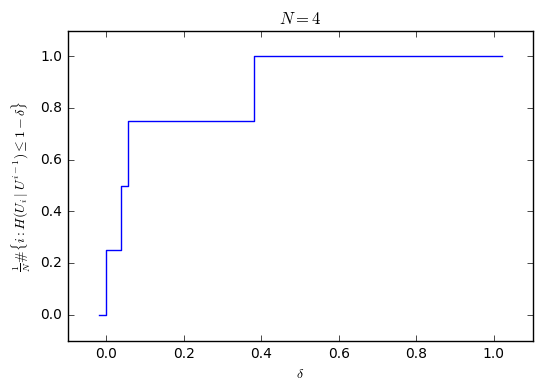

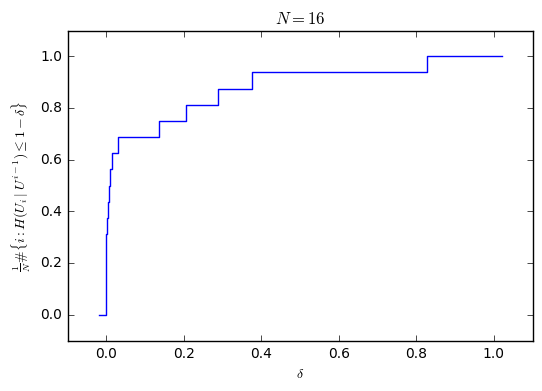

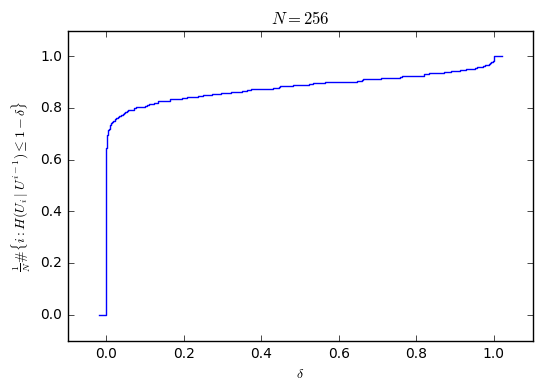

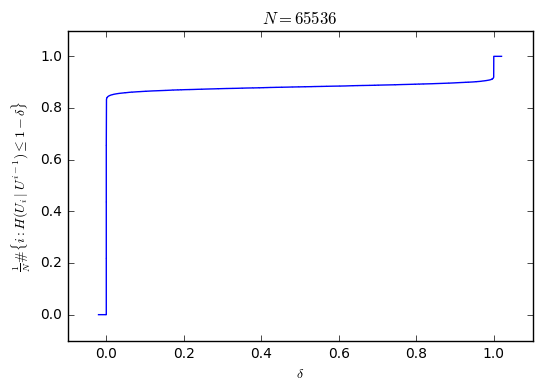

In [20]:
for n in Ns: plot2(n)